In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier



# Data import/Manipulation 

In [2]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
data = pd.read_csv("data/myAnimelist-No_Hentai.csv", usecols=['name','type','source','episodes','duration','rating', 'score', 'scored_by','rank','popularity','members', 'favorites'])
data_number_set = pd.read_csv("data/myAnimelist-No_Hentai.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites'])
display(data)
display(data_number_set)

,name,type,source,episodes,duration,rating,score,scored_by,rank,popularity,members,favorites
0,Cowboy Bebop,TV,Original,26,0:24:00,R - 17+ (violence & profanity),8.81,405664,26,39,795733,43460
1,Cowboy Bebop: Tengoku no Tobira,Movie,Original,1,1:55:00,R - 17+ (violence & profanity),8.41,120243,164,449,197791,776
2,Trigun,TV,Manga,26,0:24:00,PG-13 - Teens 13 or older,8.30,212537,255,146,408548,10432
3,Witch Hunter Robin,TV,Original,26,0:25:00,PG-13 - Teens 13 or older,7.33,32837,2371,1171,79397,537
4,Bouken Ou Beet,TV,Manga,52,0:23:00,PG - Children,7.03,4894,3544,3704,11708,14
...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Sinbi Apateu: Ghost Ball Bimil,TV,Original,24,0:24:00,G - All Ages,7.00,4,13056,15281,30,1
5556,Takoyaki Story,Music,Original,1,0:01:00,R+ - Mild Nudity,3.28,25,13254,15083,46,0
5557,Birthday Wonderland,Movie,Book,1,1:55:00,G - All Ages,6.61,327,5504,9195,835,2
5558,Ling Feng Zhe,ONA,Original,7,0:24:00,PG-13 - Teens 13 or older,6.08,38,11923,10455,467,2


,episodes,score,scored_by,rank,popularity,members,favorites
0,26,8.81,405664,26,39,795733,43460
1,1,8.41,120243,164,449,197791,776
2,26,8.30,212537,255,146,408548,10432
3,26,7.33,32837,2371,1171,79397,537
4,52,7.03,4894,3544,3704,11708,14
...,...,...,...,...,...,...,...
5555,24,7.00,4,13056,15281,30,1
5556,1,3.28,25,13254,15083,46,0
5557,1,6.61,327,5504,9195,835,2
5558,7,6.08,38,11923,10455,467,2


In [13]:
data.isnull().sum()

name          0
type          0
source        0
episodes      0
duration      0
rating        0
score         0
scored_by     0
rank          0
popularity    0
members       0
favorites     0
dtype: int64

In [ ]:
# dropping all null values
data.dropna(inplace = True) 


In [3]:
data

,name,type,source,episodes,duration,rating,score,scored_by,rank,popularity,members,favorites
0,Cowboy Bebop,TV,Original,26,0:24:00,R - 17+ (violence & profanity),8.81,405664,26,39,795733,43460
1,Cowboy Bebop: Tengoku no Tobira,Movie,Original,1,1:55:00,R - 17+ (violence & profanity),8.41,120243,164,449,197791,776
2,Trigun,TV,Manga,26,0:24:00,PG-13 - Teens 13 or older,8.30,212537,255,146,408548,10432
3,Witch Hunter Robin,TV,Original,26,0:25:00,PG-13 - Teens 13 or older,7.33,32837,2371,1171,79397,537
4,Bouken Ou Beet,TV,Manga,52,0:23:00,PG - Children,7.03,4894,3544,3704,11708,14
5,Hachimitsu to Clover,TV,Manga,24,0:23:00,PG-13 - Teens 13 or older,8.12,57065,419,536,172274,3752
6,Hungry Heart: Wild Striker,TV,Manga,52,0:23:00,PG-13 - Teens 13 or older,7.67,9307,1186,3124,17145,210
7,Initial D Fourth Stage,TV,Manga,24,0:27:00,PG-13 - Teens 13 or older,8.23,42555,298,1262,73438,635
8,Monster,TV,Manga,74,0:24:00,R+ - Mild Nudity,8.69,131233,49,156,394387,19188
9,Naruto,TV,Manga,220,0:23:00,PG-13 - Teens 13 or older,7.90,716412,705,10,1091313,39356


### Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [54]:
le = preprocessing.LabelEncoder()
# dataframe with dummies
data_le = data.copy()

# Created dummies for type column
data_le.type = le.fit_transform(data_le.type)
le.fit_transform(data_le.type)


# Made tuple for graphing labels instead of numerical data
data_list_type = ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV')                           # data.type.unique()

In [55]:
# Created dummies for source column
data_le.source = le.fit_transform(data_le.source)
le.fit_transform(data_le.source)


# Made tuple for graphing labels instead of numerical data
data_list_source = ('4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 
                    'Light novel', 'Manga', 'Music','Novel','Original', 'Other', 
                    'Picture book', 'Radio', 'Unknown', 'Visual novel','Web manga')          # data.source.unique()

In [56]:
# Created dummies for rating column
data_le.rating = le.fit_transform(data_le.rating)
le.fit_transform(data_le.rating)


# Made tuple for graphing labels instead of numerical data
data_list_rating = ('G - All Ages', 'None','PG - Children','PG-13 - Teens 13 or older',
                    'R - 17+ (violence & profanity)', 'R+ - Mild Nudity')                   # data.rating.unique()

In [57]:
data_le = data_le.drop('duration', axis = 'columns')

In [58]:
data_le

,name,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites
0,Cowboy Bebop,5,9,26,4,8.81,405664,26,39,795733,43460
1,Cowboy Bebop: Tengoku no Tobira,0,9,1,4,8.41,120243,164,449,197791,776
2,Trigun,5,6,26,3,8.30,212537,255,146,408548,10432
3,Witch Hunter Robin,5,9,26,3,7.33,32837,2371,1171,79397,537
4,Bouken Ou Beet,5,6,52,2,7.03,4894,3544,3704,11708,14
5,Hachimitsu to Clover,5,6,24,3,8.12,57065,419,536,172274,3752
6,Hungry Heart: Wild Striker,5,6,52,3,7.67,9307,1186,3124,17145,210
7,Initial D Fourth Stage,5,6,24,3,8.23,42555,298,1262,73438,635
8,Monster,5,6,74,5,8.69,131233,49,156,394387,19188
9,Naruto,5,6,220,3,7.90,716412,705,10,1091313,39356


## Correlation

In [9]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

,type,source,episodes,rating,score,scored_by,rank,popularity,members
type,1.000000,-0.102072,0.176927,0.098062,0.027355,0.120017,-0.050781,-0.168389,0.143874
source,-0.102072,1.000000,0.029282,-0.249729,-0.334873,-0.181637,0.390949,0.458842,-0.205016
episodes,0.176927,0.029282,1.000000,-0.109389,-0.012082,0.004470,0.029014,0.074446,0.002410
rating,0.098062,-0.249729,-0.109389,1.000000,0.330784,0.270104,-0.421295,-0.604778,0.306479
score,0.027355,-0.334873,-0.012082,0.330784,1.000000,0.405655,-0.843764,-0.687851,0.443969
scored_by,0.120017,-0.181637,0.004470,0.270104,0.405655,1.000000,-0.365773,-0.437970,0.987929
rank,-0.050781,0.390949,0.029014,-0.421295,-0.843764,-0.365773,1.000000,0.823963,-0.406269
popularity,-0.168389,0.458842,0.074446,-0.604778,-0.687851,-0.437970,0.823963,1.000000,-0.494001
members,0.143874,-0.205016,0.002410,0.306479,0.443969,0.987929,-0.406269,-0.494001,1.000000


In [38]:
# Checking correlations in data where the correlation is greater then 75% (highly correlated)
corr[abs(data_le_predictors.corr() > 0.75)]  < -0.75

,type,source,episodes,rating,score,scored_by,rank,popularity,members
type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
scored_by,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.987929
rank,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.823963,NaN
popularity,NaN,NaN,NaN,NaN,NaN,NaN,0.823963,1.000000,NaN
members,NaN,NaN,NaN,NaN,NaN,0.987929,NaN,NaN,1.000000


In [39]:
# Checking correlations in data where the correlation is less then -75% (highly inversely correlated)
corr[abs(data_le_predictors.corr() < -0.75)] 

,type,source,episodes,rating,score,scored_by,rank,popularity,members
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,NaN,NaN,-0.843764,NaN,NaN
scored_by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,NaN,NaN,NaN,NaN,-0.843764,NaN,NaN,NaN,NaN
popularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
members,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


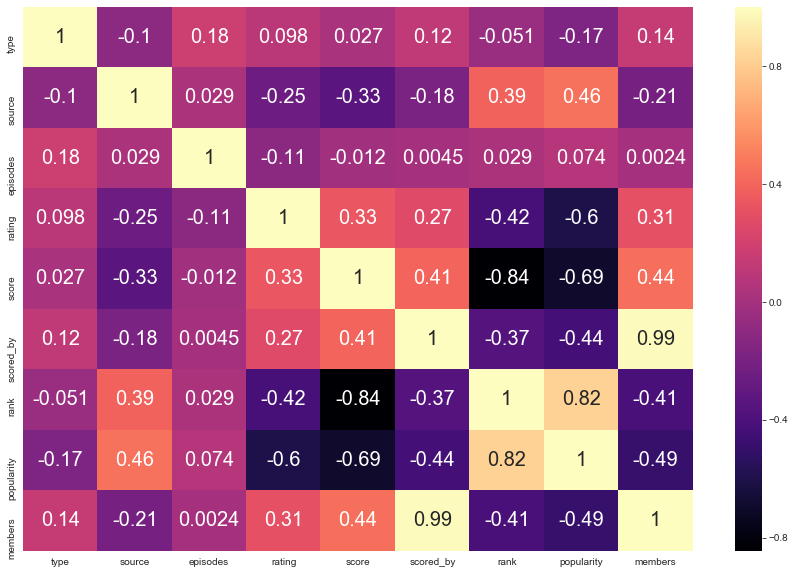

In [11]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='magma')


### OLM for rank~score

In [12]:
abs(corr).sort_values(by = 'rank',  ascending= False)['rank']
data_reg_simple = ols(formula= "rank~score", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:48:42   Log-Likelihood:                -50565.
No. Observations:                5560   AIC:                         1.011e+05
Df Residuals:                    5558   BIC:                         1.011e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.953e+04    207.622    142.224      0.000    2.91e+04    2.99e+04
score      -3568.8423     30.450   -117.203      0.000   -3628.537   -3509.148
==============================================================================
Omnibus:                     2974.083   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22826.772
Skew:                           2.481   Prob(JB):                         0.00
Kurtosis:                      11.597   Cond. No.                         50.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLM for popularity~rank

In [13]:
abs(corr).sort_values(by = 'popularity',  ascending= False)['popularity']
data_reg_simple = ols(formula= "popularity~rank", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 1.175e+04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:48:42   Log-Likelihood:                -51576.
No. Observations:                5560   AIC:                         1.032e+05
Df Residuals:                    5558   BIC:                         1.032e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    869.9879     58.332     14.914      0.000     755.634     984.341
rank           0.9362      0.009    108.407      0.000       0.919       0.953
==============================================================================
Omnibus:                       44.003   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.936
Skew:                          -0.218   Prob(JB):                     1.75e-10
Kurtosis:                       2.943   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for score~popularity

In [14]:
abs(corr).sort_values(by = 'score',  ascending= False)['score']
data_reg_simple = ols(formula= "score~popularity", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4991.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:48:42   Log-Likelihood:                -5817.6
No. Observations:                5560   AIC:                         1.164e+04
Df Residuals:                    5558   BIC:                         1.165e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6044      0.015    500.376      0.000       7.575       7.634
popularity    -0.0001   2.03e-06    -70.649      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      540.656   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1349.535
Skew:                          -0.569   Prob(JB):                    8.96e-294
Kurtosis:                       5.129   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for members~scored_by

In [15]:
abs(corr).sort_values(by = 'members',  ascending= False)['members']
data_reg_simple = ols(formula= "members~scored_by", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                members   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.261e+05
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:48:42   Log-Likelihood:                -62852.
No. Observations:                5560   AIC:                         1.257e+05
Df Residuals:                    5558   BIC:                         1.257e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7810.6158    281.185     27.778      0.000    7259.384    8361.848
scored_by      1.7143      0.004    475.466      0.000       1.707       1.721
==============================================================================
Omnibus:                     1791.226   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           438585.153
Skew:                           0.034   Prob(JB):                         0.00
Kurtosis:                      46.511   Cond. No.                     8.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the relationships between the different categories

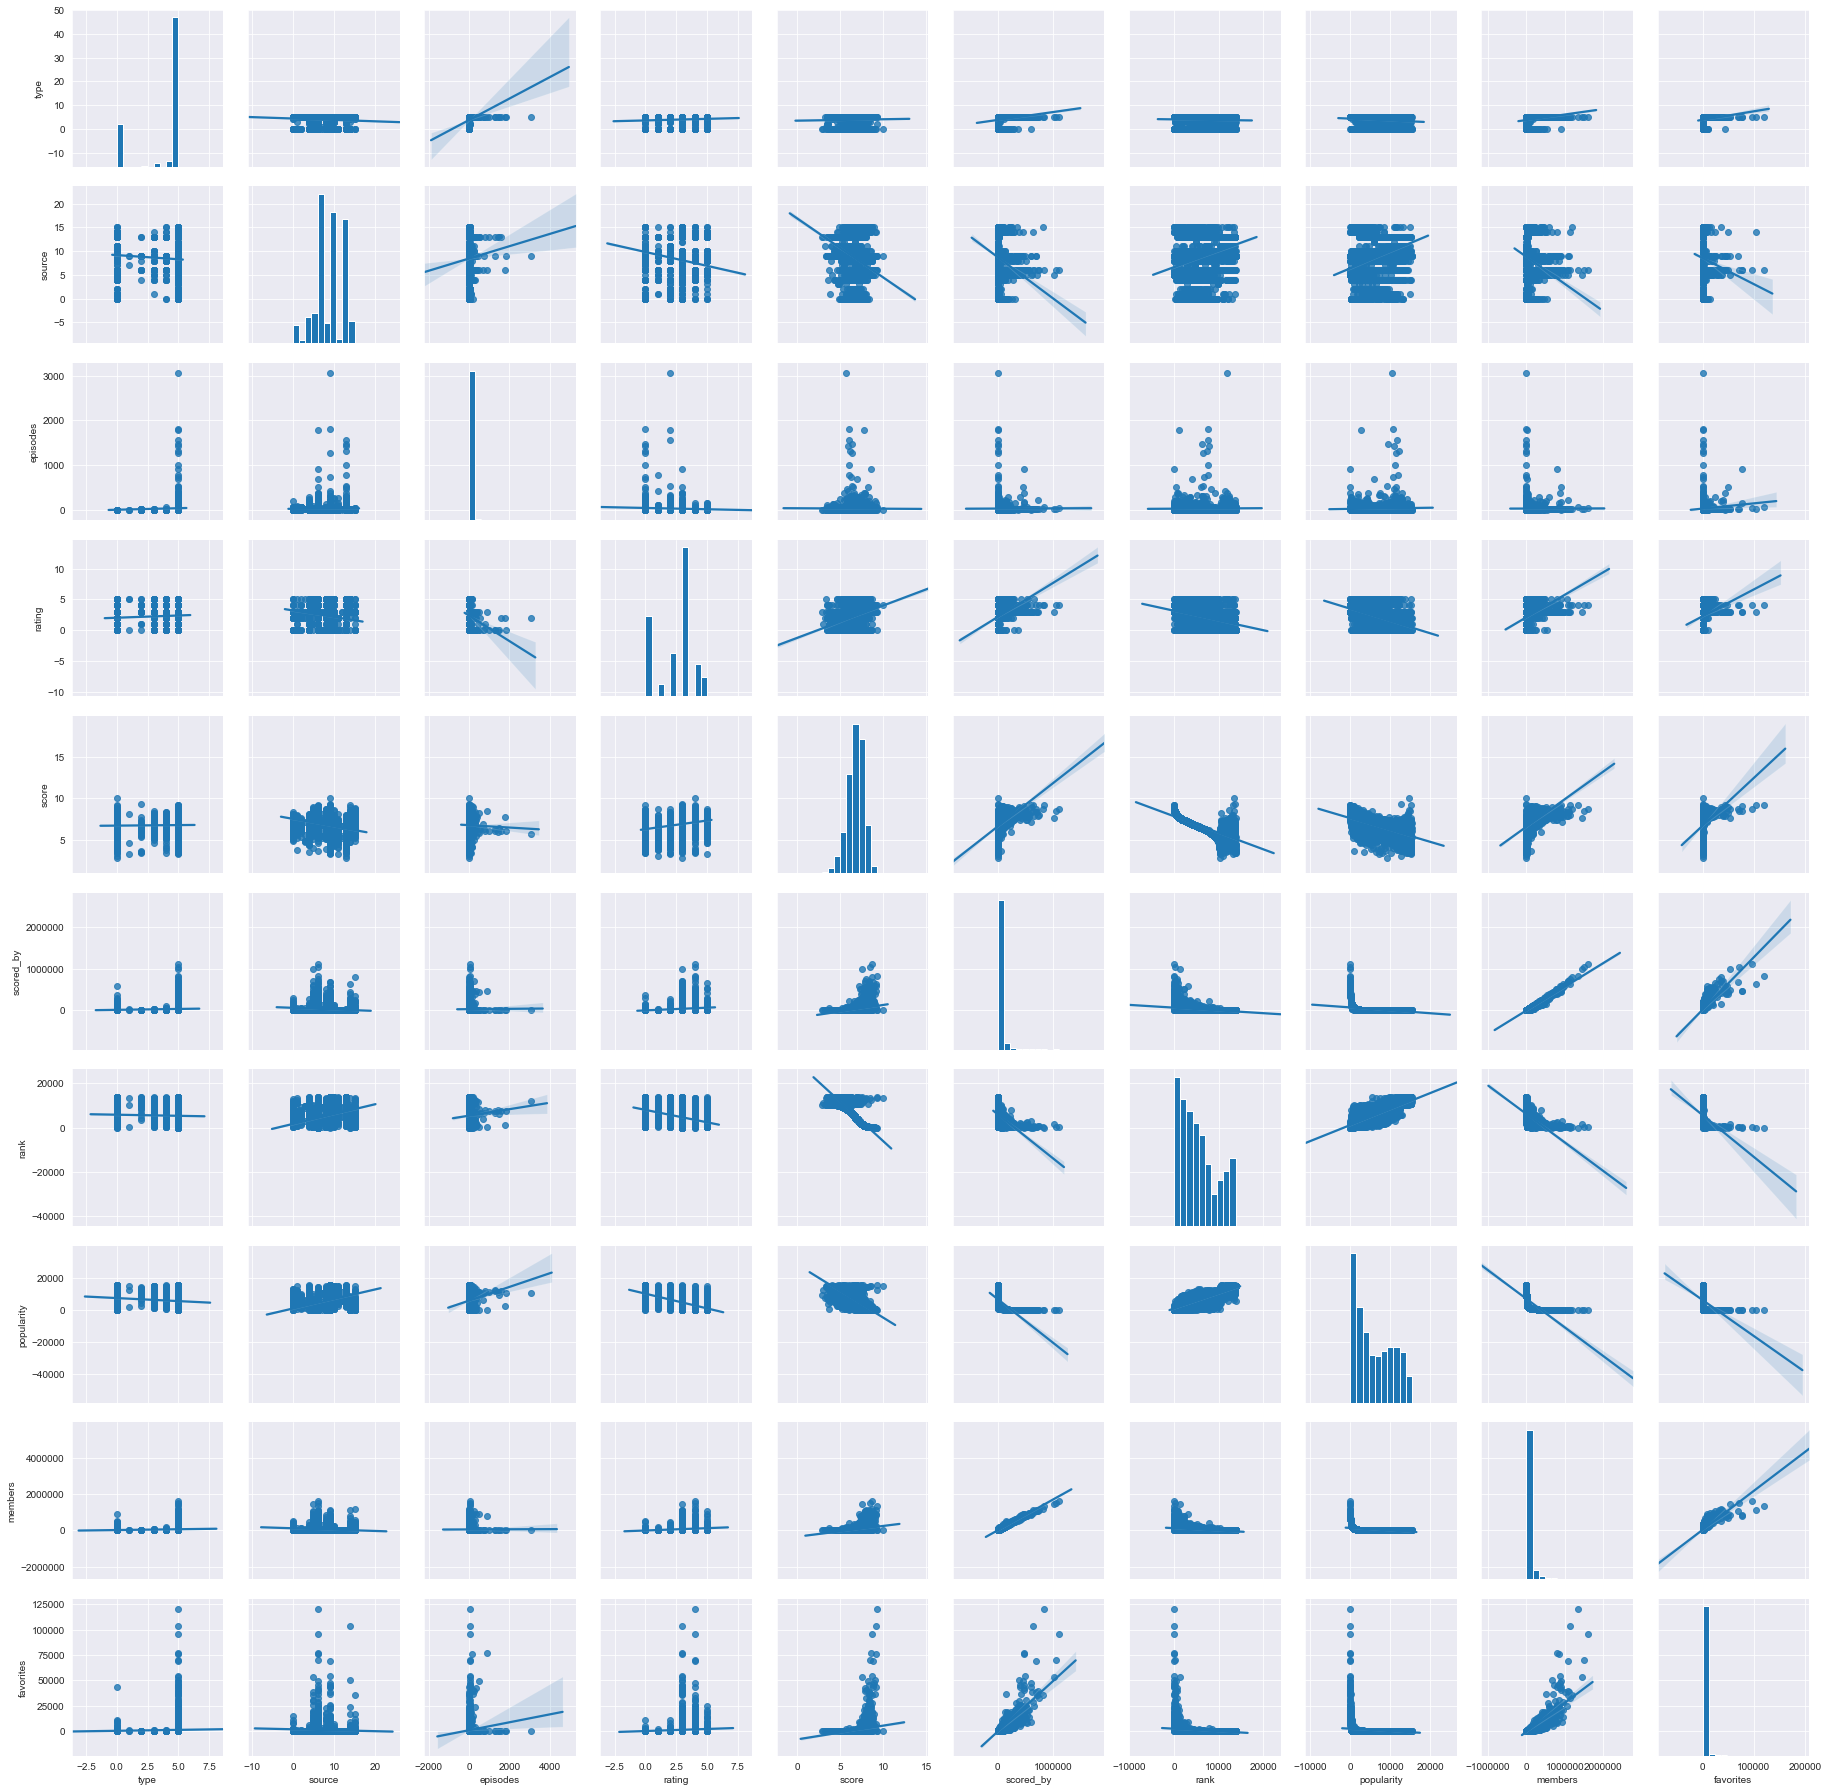

In [16]:
sns.pairplot(data_le, kind='reg' )

Visualizing relationship with each column of my dataset

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


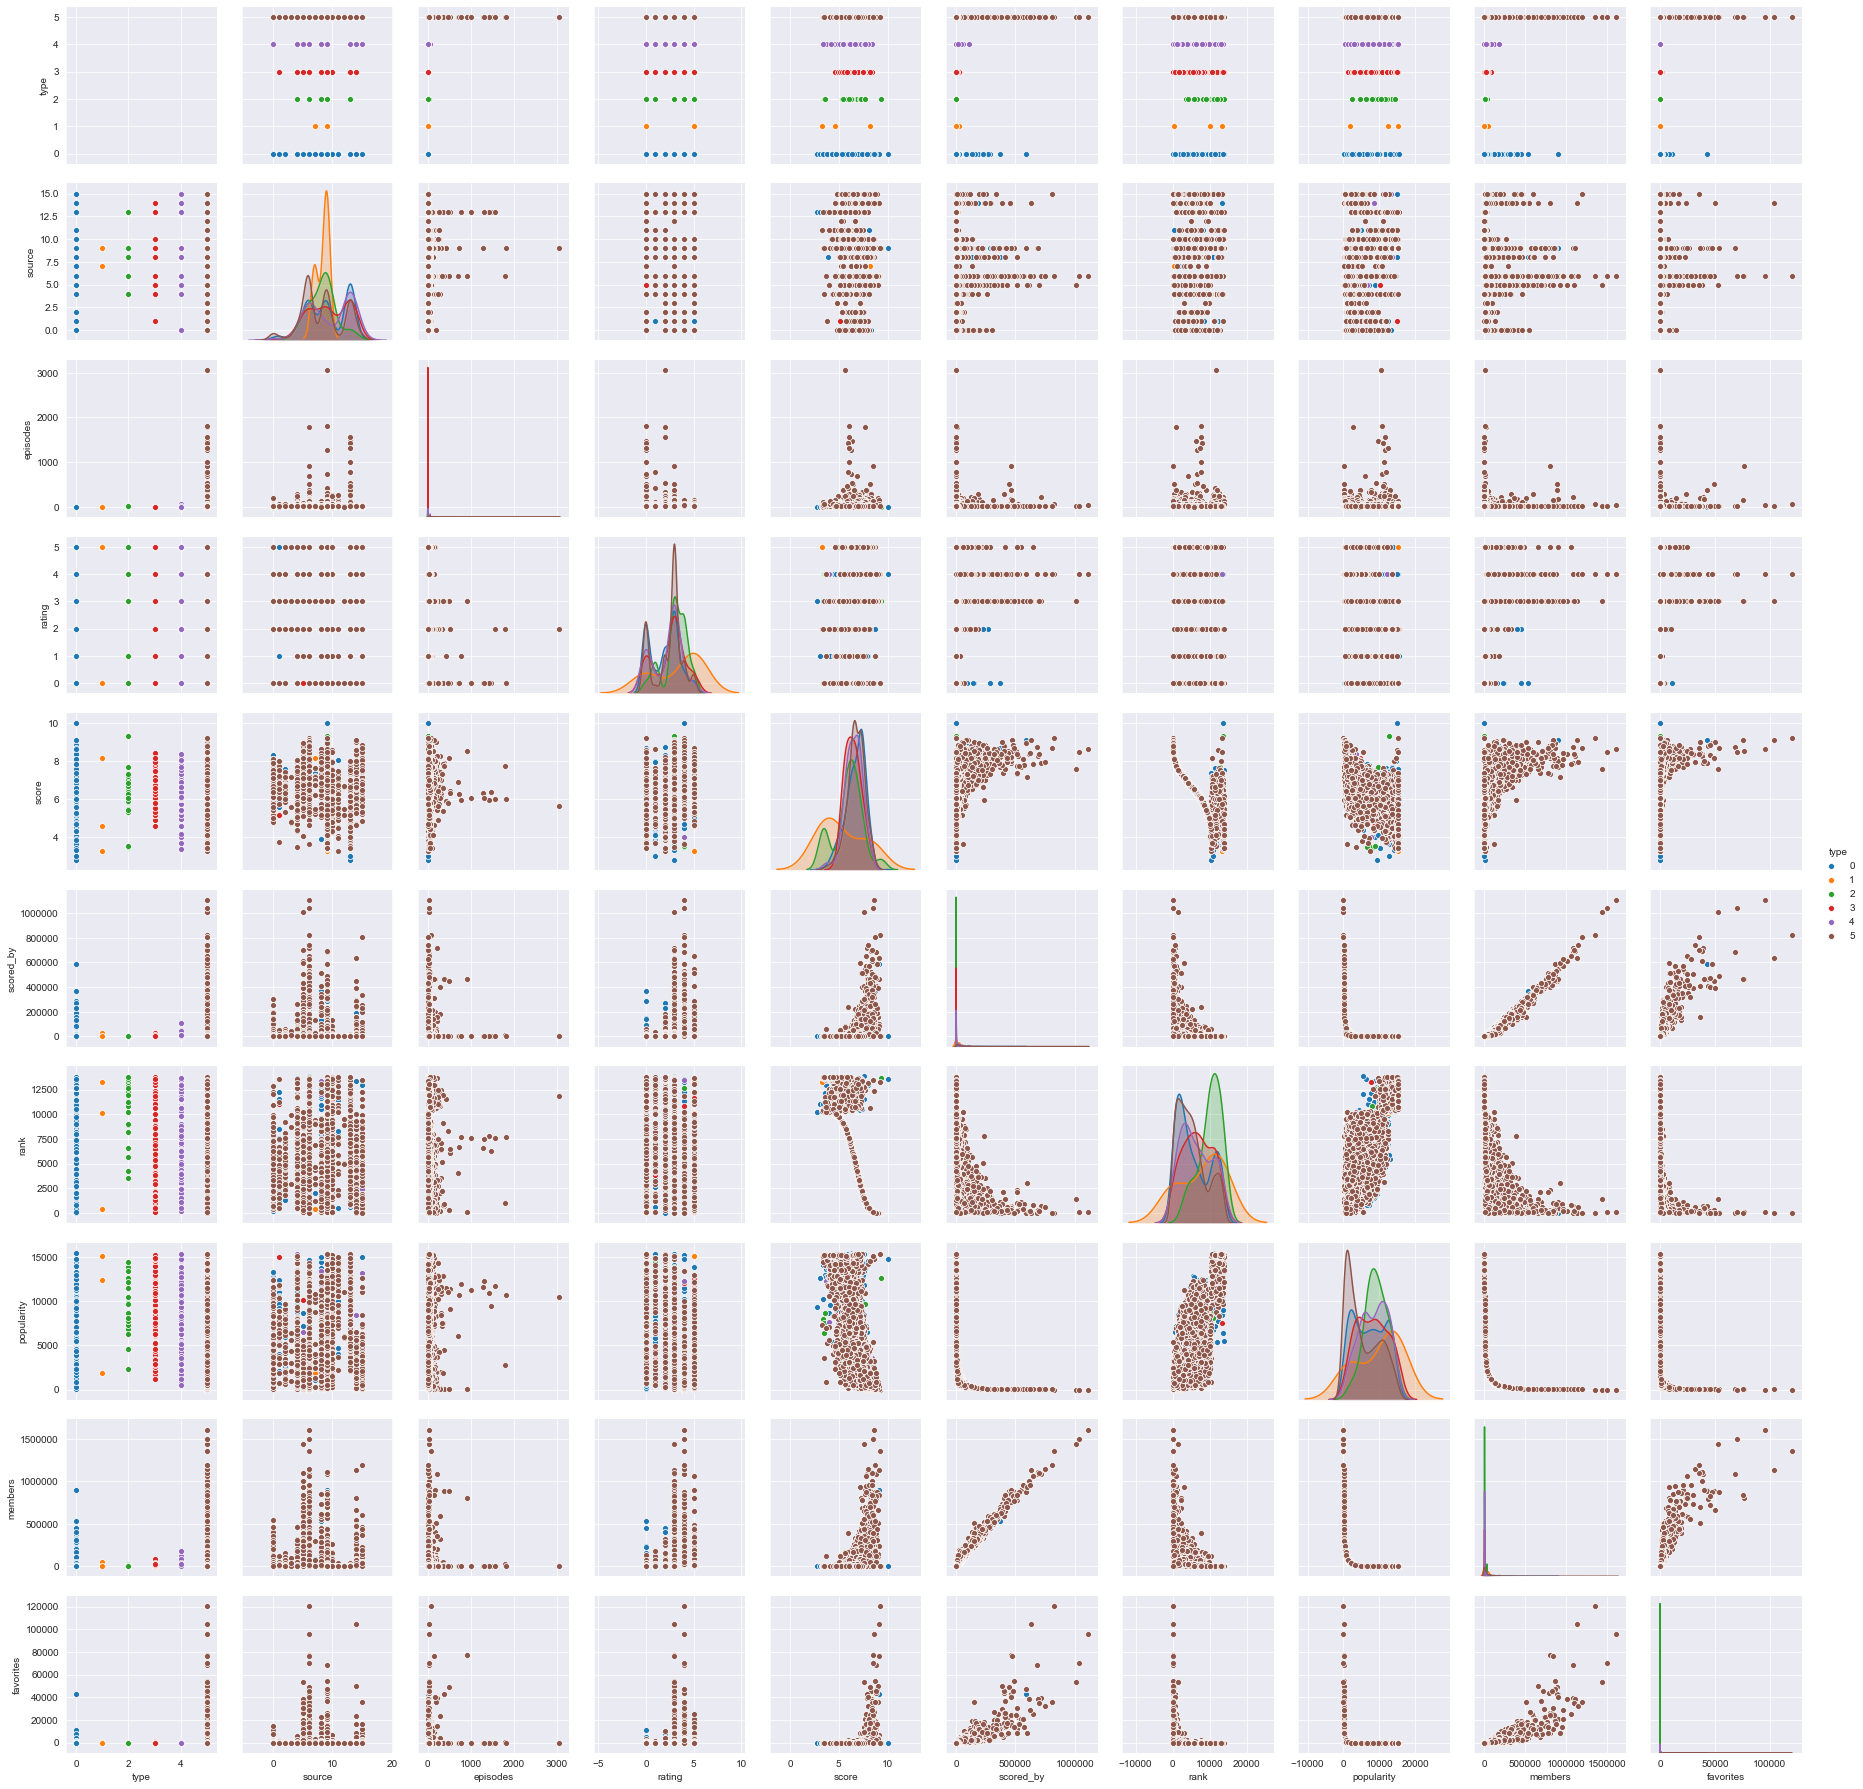

In [17]:
sns.pairplot(data_le, hue ='type')

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


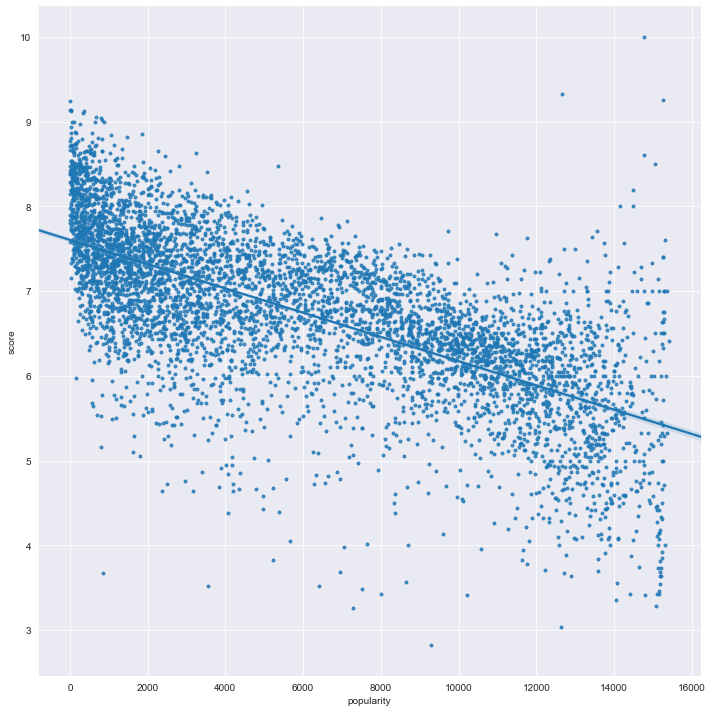

In [18]:

sns.lmplot(x='popularity', y='score', data= data, markers=[ "."], fit_reg =True,size = 10)


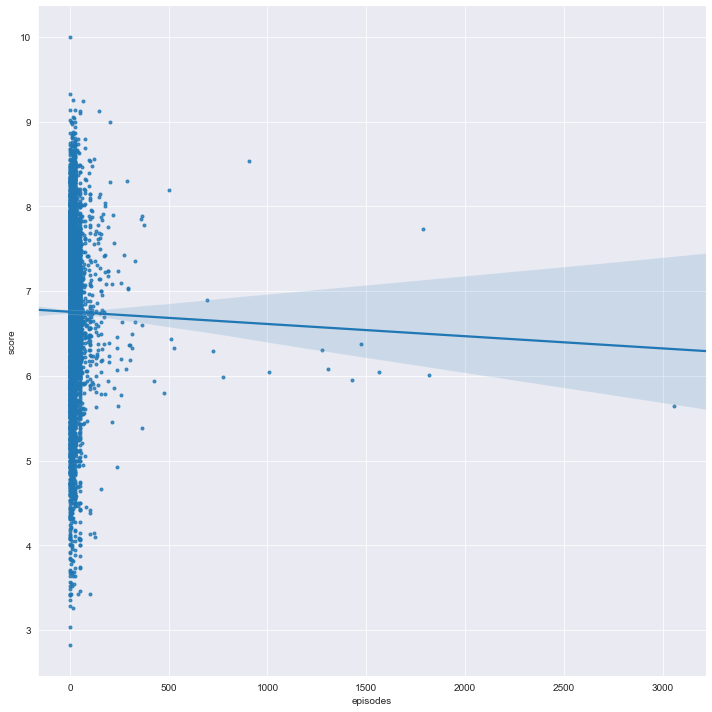

In [19]:
sns.lmplot(x='episodes', y='score', data= data, markers=[ "."], fit_reg =True,size = 10)

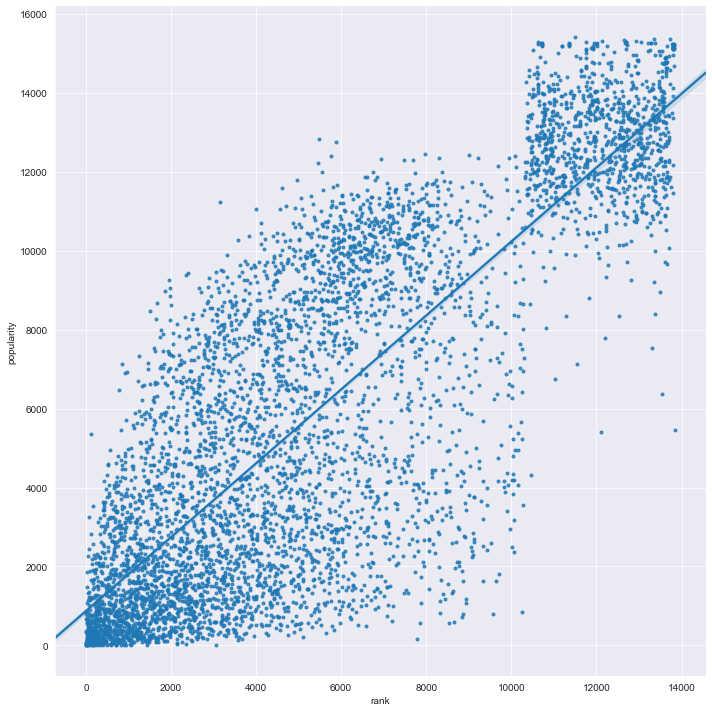

In [20]:
sns.lmplot(x='rank', y='popularity', data= data, markers=["."], fit_reg =True,size = 10)

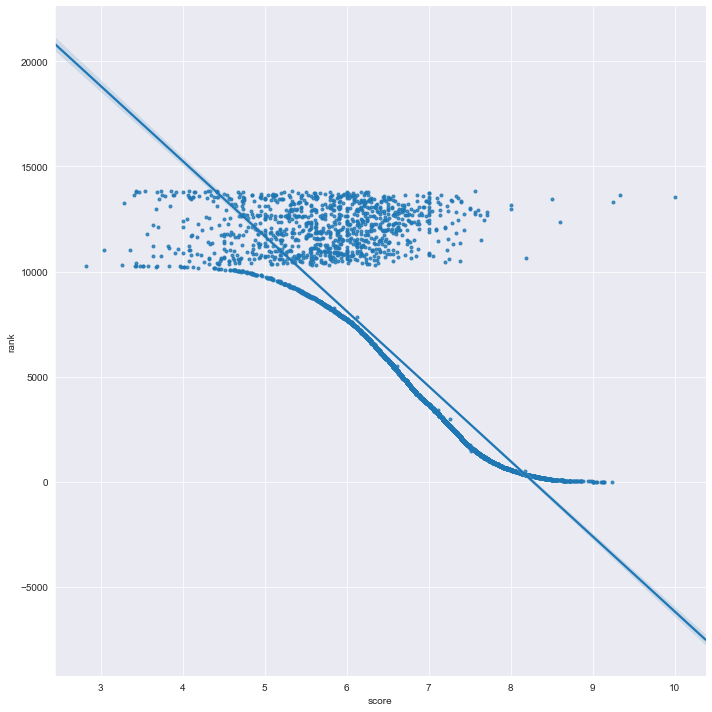

In [21]:
sns.lmplot(x='score', y='rank', data= data, markers=[ "."], fit_reg =True,size = 10)

Box plot of the relationship for type against rank and score

([<matplotlib.axis.XTick at 0x1c2bd98588>,
 <a list of 6 Text xticklabel objects>)

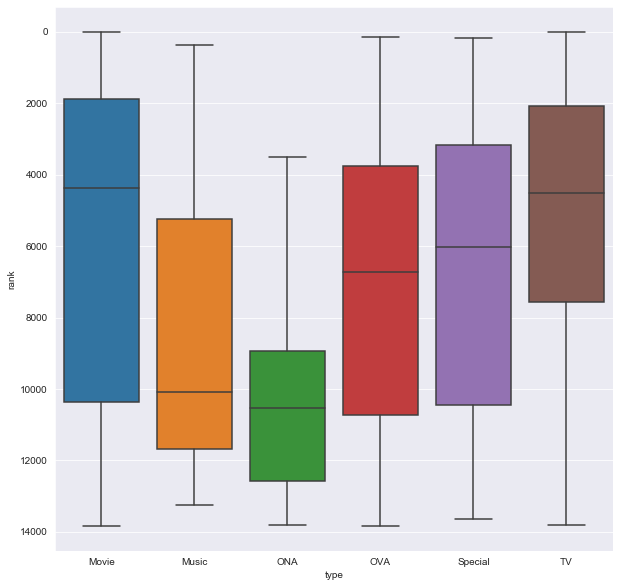

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=data_le, x='type' ,y= 'rank', orient='v')
plt.gca().invert_yaxis()
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

([<matplotlib.axis.XTick at 0x1c2cac4748>,
 <a list of 6 Text xticklabel objects>)

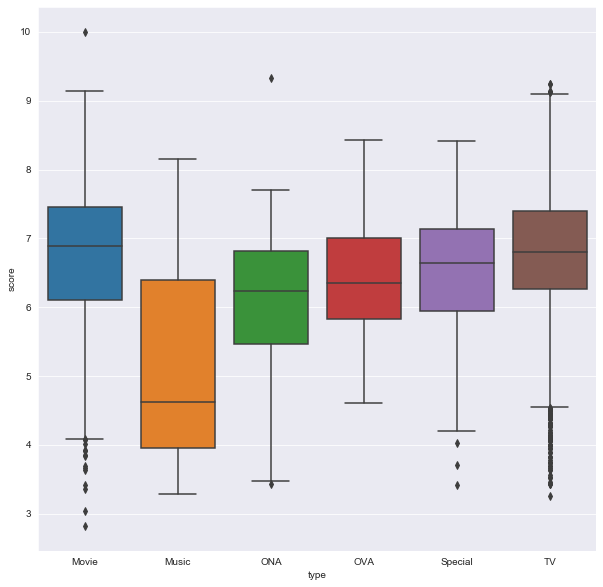

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=data_le, x='type' ,y= 'score', orient='v', )
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

([<matplotlib.axis.XTick at 0x1c2cbd0208>,
 <a list of 16 Text xticklabel objects>)

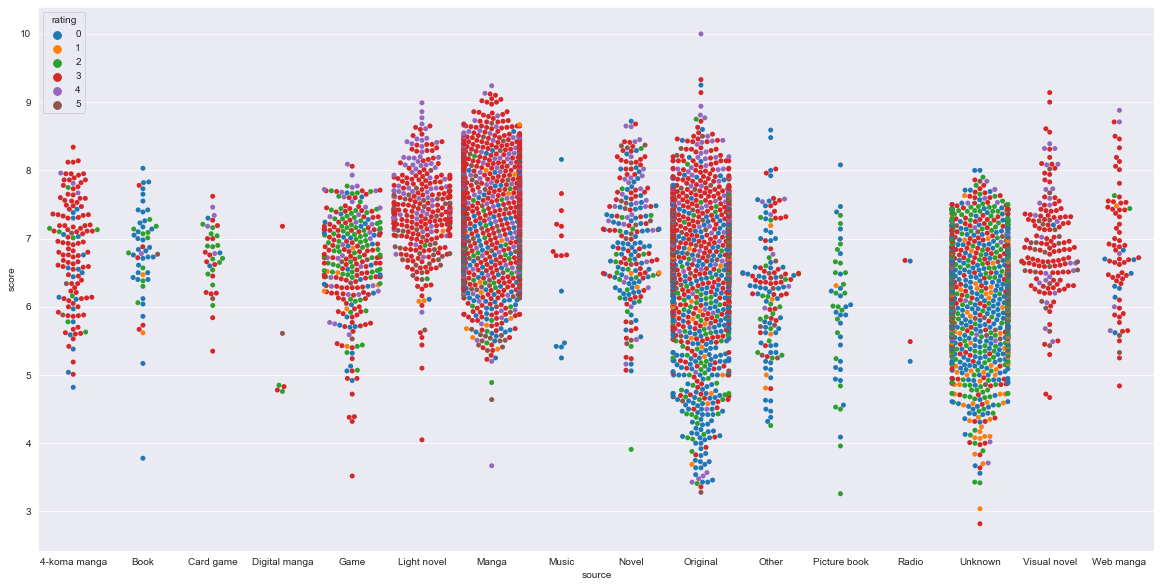

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='source' ,y= 'score', size=5, orient='v', hue='rating')
plt.xticks(np.arange(len(data_list_source)), data_list_source)


In [25]:
data.columns

Index(['name', 'type', 'source', 'episodes', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites'],
      dtype='object')

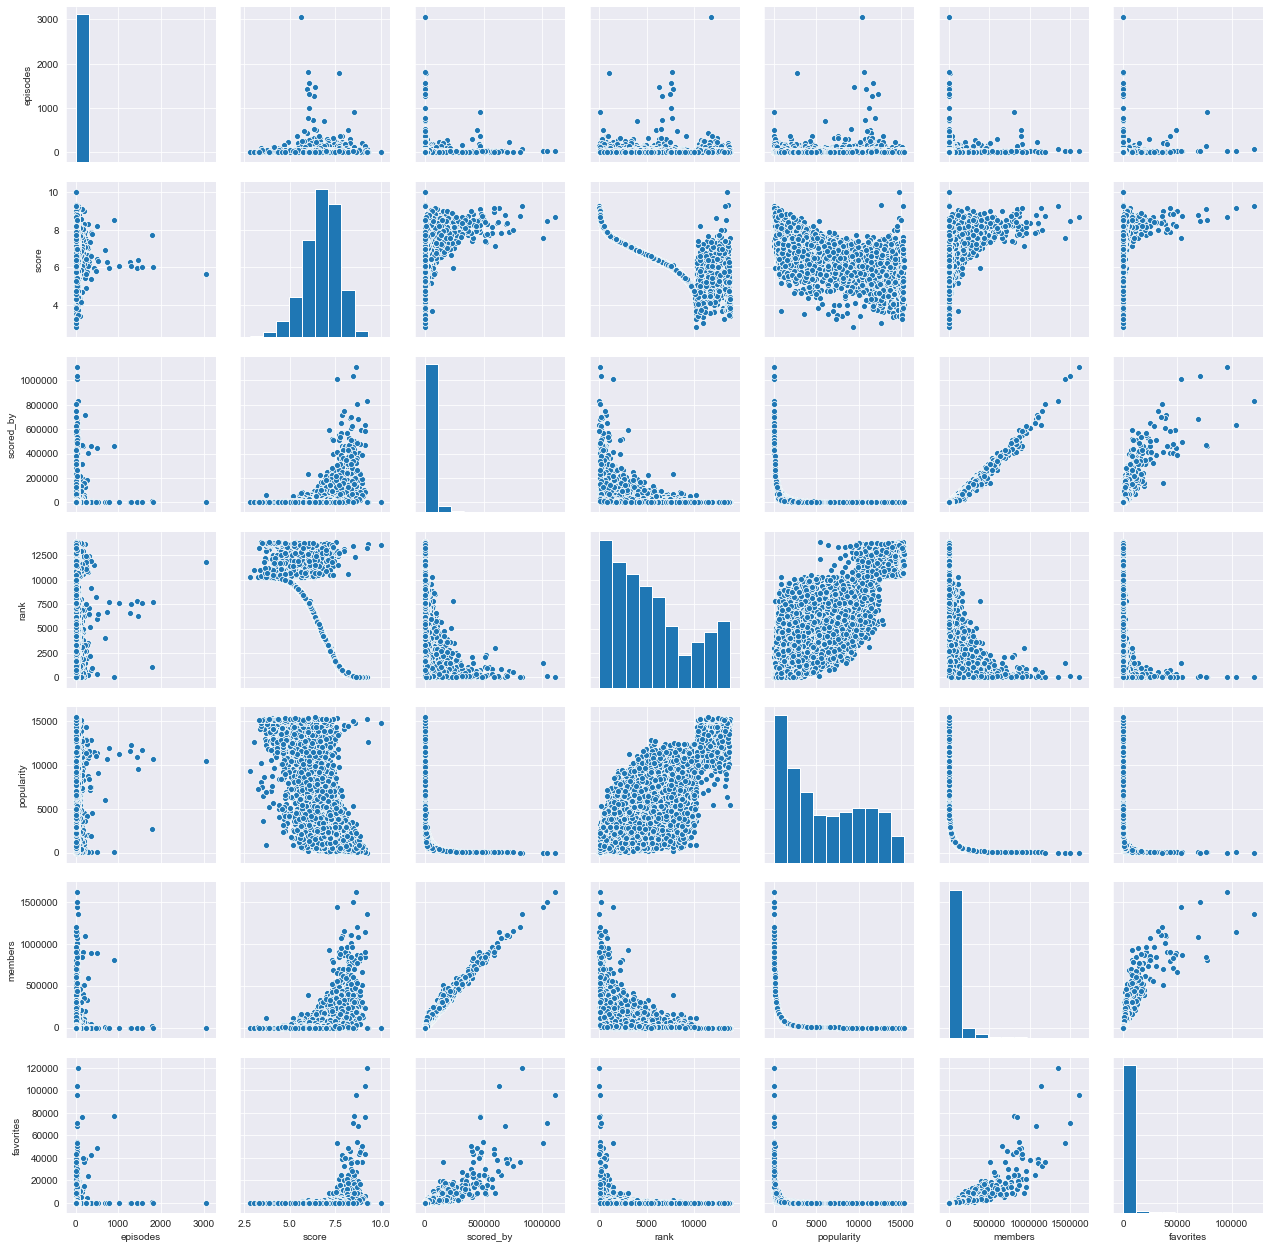

In [26]:
sns.pairplot(data_number_set)

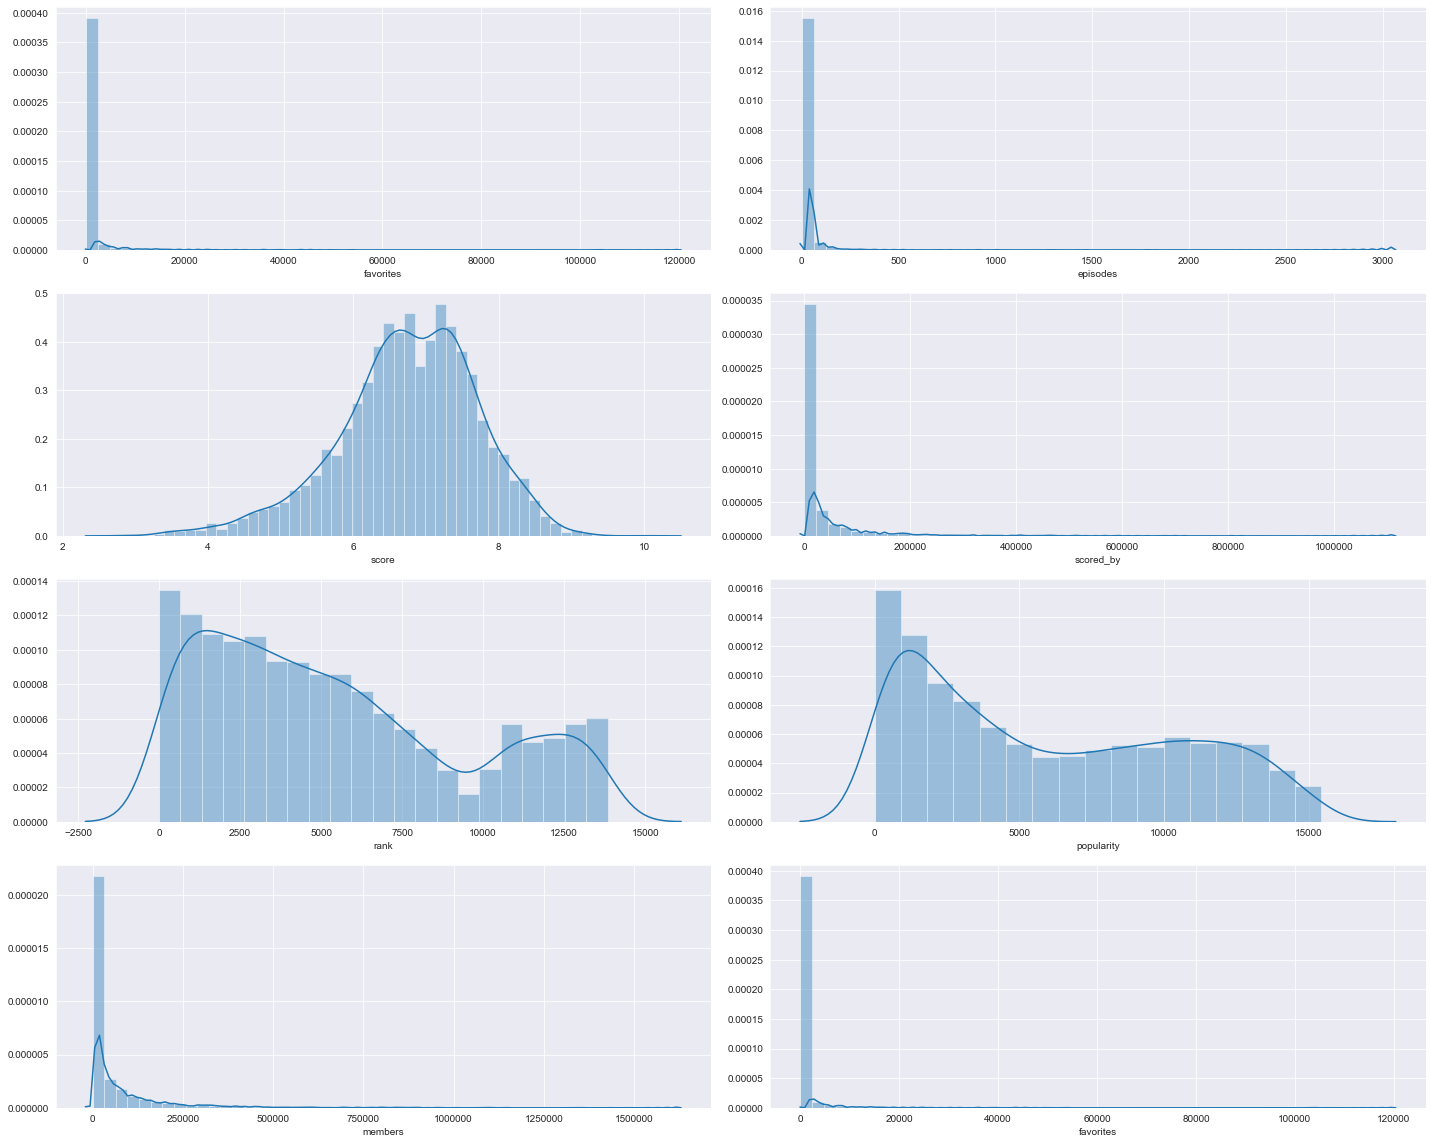

In [27]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_number_set.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_number_set[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

### This pairing showed the highest correlation

# Total # of Scores vs Total # of Members

In [28]:
#selecting the columns in the data and labeling them 
rank=data_le.iloc[:,7]
popularity=data_le.iloc[:,8]
score_by=data_le.iloc[:,6]
score=data_le.iloc[:,5]
members=data_le.iloc[:,9]


#Assigning X and y values aswell as the train and test of X and y

X1 = score_by.values.reshape(-1,1)
y1 = members.values.reshape(-1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=3)



In [29]:
y1_test.shape

(1668,)

Preformed a Cross Validation on Linear Regression because it was the most accurate

In [65]:
# Linear Regression
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred_lr = lr.predict(X1_test)
#testing the accuracy of the train and test 
lr_accuracy_train = lr.score(X1_train,y1_train)
lr_accuracy_test = lr.score(X1_test,y1_test)


print(f'Linear Regression train accuracy is: {lr_accuracy_train}\nLinear Regression test accuracy is: {lr_accuracy_test}')

# Cross Validation - Linear Regression

lr_cross_val_score = cross_val_score(lr, X1,y1, cv=10)
lr_cv_score_avg = lr_cross_val_score.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg}')
cv_pred_lr = cross_val_predict(lr, X1_test, y1_test, cv=10)



Linear Regression train accuracy is: 0.9761084201079713
Linear Regression test accuracy is: 0.9757110257333939
Avg Cross Val Linear Regression is: 0.9670087399776243


(10,)

In [139]:
scored_by_test = X1_test.reshape(1, -1)
members_test = y1_test.reshape(1, -1)
lr_members_predict = y1_pred_lr.reshape(1, -1)
cross_val_lr_members_predict = cv_pred_lr.reshape(1, -1)

d1 = pd.DataFrame(np.hstack([y1_test]))
d2 = pd.DataFrame(np.hstack([y1_pred_lr]))
d3 = pd.DataFrame(np.hstack([cv_pred_lr]))

# pd.DataFrame([[y1_test],[y1_pred_lr],[cv_pred_lr]])
# df1_transposed = df1.transpose()
df1 = pd.DataFrame(data=d1)
df2 = pd.DataFrame(data=d2)
df3 = pd.DataFrame(data=d3)


pd.DataFrame(np.concatenate([df1, df2, df3], axis=1), columns= ['Test set Members','Linear Reg Predicted Members','Cross Val. Linear Reg Predicted Members '])



,Test set Members,Linear Reg Predicted Members,Cross Val. Linear Reg Predicted Members
0,51172.0,2.711402e+04,2.745216e+04
1,200540.0,2.143331e+05,2.136109e+05
2,27997.0,3.209470e+04,3.240463e+04
3,1102.0,8.342150e+03,8.786601e+03
4,567.0,7.868374e+03,8.315508e+03
5,1263.0,8.347319e+03,8.791740e+03
6,165.0,7.637516e+03,8.085957e+03
7,416791.0,4.074391e+05,4.056233e+05
8,6275.0,1.044227e+04,1.087483e+04
9,48461.0,3.931505e+04,3.958409e+04


In [31]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X1_train,y1_train)
y1_pred_rr = rr.predict(X1_test)

rr_accuracy_train = rr.score(X1_train,y1_train)
rr_accuracy_test = rr.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 0.01 train accuracy is: {rr_accuracy_train}\nRidge Regression @ alpha = 0.01 test accuracy is: {rr_accuracy_test}')

rr100 = Ridge(alpha=100)
rr100.fit(X1_train,y1_train)
y1_pred_rr100 = rr100.predict(X1_test)

rr100_accuracy_train = rr100.score(X1_train,y1_train)
rr100_accuracy_test = rr100.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 100 train accuracy is:  {rr100_accuracy_train}\nRidge Regression @ alpha = 100 test accuracy is:  {rr100_accuracy_test}')


# Cross Validation - Linear Regression

rr_cross_val_score = cross_val_score(rr, X1,y1, cv=10)
rr_cv_score_avg = rr_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 0.01 is: {rr_cv_score_avg}')
cv_pred_rr = cross_val_predict(rr, X1_test, y1_test, cv=10)


# Cross Validation - Linear Regression

rr100_cross_val_score = cross_val_score(rr100, X1,y1, cv=10)
rr100_cv_score_avg = rr100_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 100 is:  {rr100_cv_score_avg}')
cv_pred_rr100 = cross_val_predict(rr100, X1_test, y1_test, cv=10)


Ridge Regression @ alpha = 0.01 train accuracy is: 0.9761084201079713
Ridge Regression @ alpha = 0.01 test accuracy is: 0.9757110257333939
Ridge Regression @ alpha = 100 train accuracy is:  0.9761084201079713
Ridge Regression @ alpha = 100 test accuracy is:  0.9757110257335438
Avg Cross Val Ridge Regression alpha @ 0.01 is: 0.9670087399776243
Avg Cross Val Ridge Regression alpha @ 100 is:  0.967008739977536


In [32]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01,max_iter=5560)
lasso01.fit(X1_train,y1_train)
y1_pred_lasso01 = lasso01.predict(X1_test)

lasso01_accuracy_train = lasso01.score(X1_train,y1_train)

lasso01_accuracy_test = lasso01.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train}\nLasso Regression @ alpha 0.01 test accuracy is:  {lasso01_accuracy_test}')

lasso05 = Lasso(alpha=0.05,max_iter=5560)
lasso05.fit(X1_train,y1_train)
y1_pred_lasso05 = lasso05.predict(X1_test)

lasso05_accuracy_train = lasso05.score(X1_train,y1_train)

lasso05_accuracy_test = lasso05.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.05 train accuracy is: {lasso05_accuracy_train}\nLasso Regression @ alpha 0.05 test accuracy is:  {lasso05_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)

lasso05_cross_val_score = cross_val_score(lasso05, X1,y1, cv=10)
lasso05_cv_score_avg = lasso05_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.05 is: {lasso05_cv_score_avg}')
cv_pred_lasso05 = cross_val_predict(lasso05, X1_test, y1_test, cv=10)

Lasso Regression @ alpha 0.01 train accuracy is: 0.9761084201079713
Lasso Regression @ alpha 0.01 test accuracy is:  0.9757110257334277
Lasso Regression @ alpha 0.05 train accuracy is: 0.9761084201079713
Lasso Regression @ alpha 0.05 test accuracy is:  0.9757110257335632
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.9670087399775984
Avg Cross Val Lasso Regression alpha @ 0.05 is: 0.9670087399774939


In [33]:
#LogisticRegression
logreg= LogisticRegression(C=1,fit_intercept=True)
logreg.fit(X1_train,y1_train)
y1_pred_logreg = logreg.predict(X1_test)

logreg_accuracy_train = logreg.score(X1_train,y1_train)

logreg_accuracy_test = logreg.score(X1_test,y1_test)
                                              
                                    
print(f'Logistic Regression train accuracy is {logreg_accuracy_train} and Logistic Regression test accuracy is {logreg_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression train accuracy is 0.001541623843782117 and Logistic Regression test accuracy is 0.0
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.9670087399775984


In [34]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1_test, y1_test)
y1_pred_knn = knn.predict(X1_test)


# K_nearest Neighbor = 5 
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X1_test, y1_test)
y1_pred_knn5 = knn5.predict(X1_test)



knn_accuracy_train = knn.score(X1_train,y1_train)
knn_accuracy_test = knn.score(X1_test,y1_test)

knn5_accuracy_train = knn5.score(X1_train,y1_train)
knn5_accuracy_test = knn5.score(X1_test,y1_test)


print(f'K_nearest Neighbor = 1 Regression train accuracy is {knn_accuracy_train}\nK_nearest Neighbor = 1 Regression test accuracy is {knn_accuracy_test}\n')
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test}')


K_nearest Neighbor = 1 Regression train accuracy is 0.0012846865364850976
K_nearest Neighbor = 1 Regression test accuracy is 0.7643884892086331

K_nearest Neighbor = 5 Regression train accuracy is 0.0017985611510791368
K_nearest Neighbor = 5 Regression test accuracy is 0.18585131894484413


In [40]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1_train,y1_train)
rf.score(X1_test,y1_test)
y1_pred_rf_1 = rf.predict(X1_test)

rf_accuracy_train_1 = rf.score(X1_train,y1_train)
rf_accuracy_test_1 = rf.score(X1_test,y1_test)
 
print(f'Random Forest Classifier train accuracy is {rf_accuracy_train_1} and Random Forest Classifier test accuracy is {rf_accuracy_test_1}')


Random Forest Classifier train accuracy is 0.6957862281603289 and Random Forest Classifier test accuracy is 0.0017985611510791368


Not needed but this is used to find the optimal k nearest neighbor from the range specified


In [ ]:

# k_range= range(1,20)
# scores= []
# for k in k_range:
#     kknn = neighbors.KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X1_train, y1_train)
# #     y1_pred_knn = knn.predict(X1_test)
#     scores.append(knn.score(X1_test,y1_test))
# plt.plot(k_range,scores)


# Ploting the Predicted Values for each model

Original Dataset


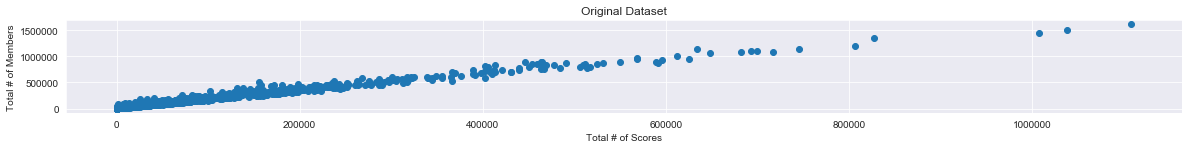

Predicted Model for Linear Regression


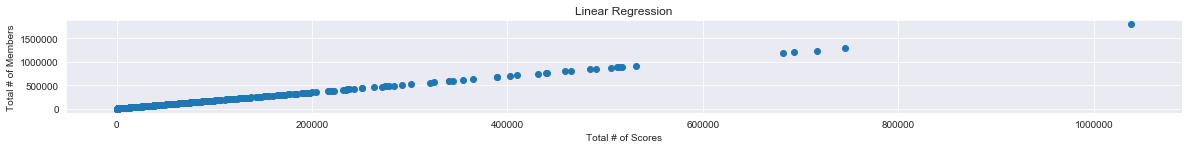

Predicted Cross Validation Model for Linear Regression


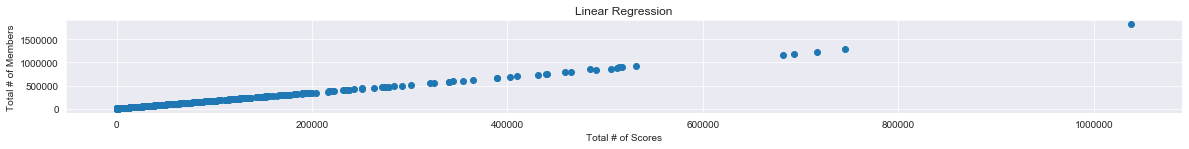

Predicted Model for Logistic Regression


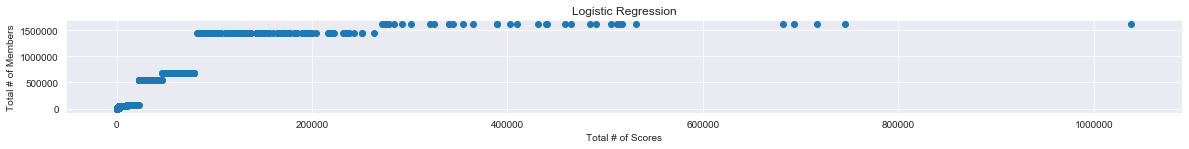

Predicted Model for Ridge Regression @ alpha = 0.01


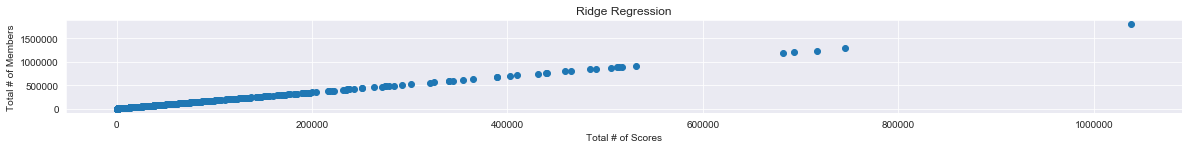

Predicted Model for Lasso Regression @ alpha = 0.01


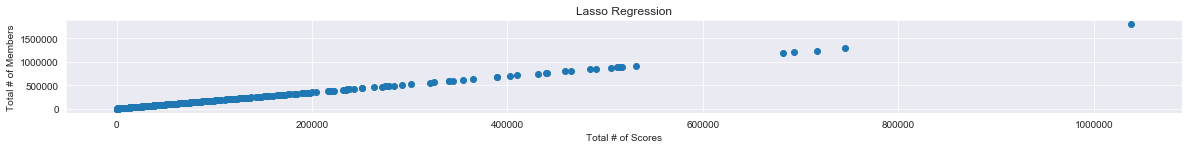

Predicted Model for K-nearest Neighbors Regression @ 1


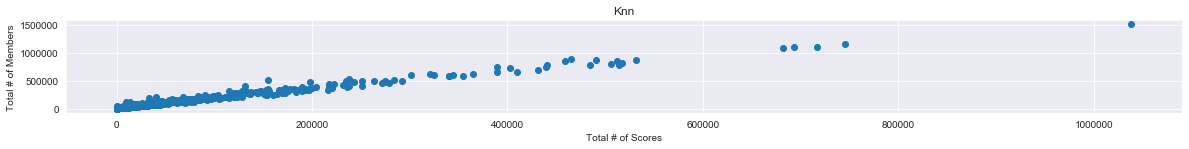

Predicted Model for Random Forest Classifier @ N Estimators 100


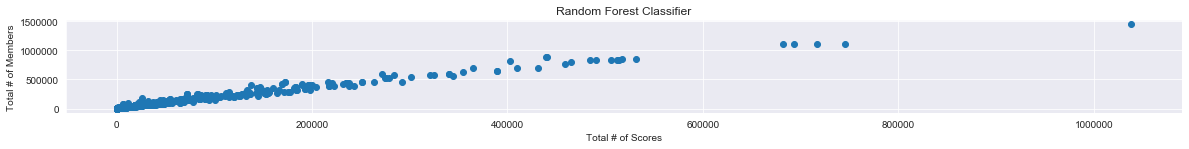

In [48]:
# ploting Linear Regression model
print('Original Dataset')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(811)
plt.scatter(X1,y1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Original Dataset')
plt.show()


# ploting Linear Regression model
print('Predicted Model for Linear Regression')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(812)
plt.scatter(X1_test,y1_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Linear Regression model
print('Predicted Cross Validation Model for Linear Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(813)
plt.scatter(X1_test, cv_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Logistic Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(814)
plt.scatter(X1_test,y1_pred_logreg)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Logistic Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Ridge Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(815)
plt.scatter(X1_test,y1_pred_rr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Ridge Regression')
plt.show()


# ploting Lasso Regression model
print('Predicted Model for Lasso Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(816)
plt.scatter(X1_test,y1_pred_lasso01)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Lasso Regression')
plt.show()


# ploting Knn model Neighbor=1
print('Predicted Model for K-nearest Neighbors Regression @ 1')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(817)
plt.scatter(X1_test,y1_pred_knn)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Knn')
plt.show()


# ploting Random Forest Classifier =1 Model
print('Predicted Model for Random Forest Classifier @ N Estimators 100')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(818)
plt.scatter(X1_test,y1_pred_rf_1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Random Forest Classifier')
plt.show()


# Rank against Score

In [42]:
#Assigning X and y values aswell as the train and test of X and y
X2 = rank.values.reshape(-1,1)
y2 = score.values.reshape(-1)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=3)


In [43]:
#Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X2_train,y2_train)

y2_pred_lr = lr.predict(X2_test)

lr_accuracy_train2 = lr.score(X2_train,y2_train)

lr_accuracy_test2 = lr.score(X2_test,y2_test)
 
    
print(f'Linear Regression train accuracy is: {lr_accuracy_train2}\nLinear Regression test accuracy is: {lr_accuracy_test2}')


# Cross Validation - Linear Regression
lr_cross_val_score2 = cross_val_score(lr, X2,y2, cv=10)
lr_cv_score_avg2 = lr_cross_val_score2.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg2}')
cv_pred_lr2 = cross_val_predict(lr, X2_test, y2_test, cv=10)


Linear Regression train accuracy is: 0.7158371469432536
Linear Regression test accuracy is: 0.6960977586810557
Avg Cross Val Linear Regression is: 0.7255555957655252


In [44]:
X2_test.shape

(1112, 1)

In [45]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X2_train,y2_train)
y2_pred_rr = rr.predict(X2_test)

rr_accuracy_train2 = rr.score(X2_train,y2_train)

rr_accuracy_test2 = rr.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr_accuracy_train2}\nRidge Regression test accuracy is: {rr_accuracy_test2}')

rr100 = Ridge(alpha=100)
rr100.fit(X2_train,y2_train)
y2_pred_rr100 = rr100.predict(X2_test)

rr100_accuracy_train2 = rr100.score(X2_train,y2_train)

rr100_accuracy_test2 = rr100.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr100_accuracy_train2}\nRidge Regression test accuracy is: {rr100_accuracy_test2}')



Ridge Regression train accuracy is: 0.7158371469432536
Ridge Regression test accuracy is: 0.6960977586810573
Ridge Regression train accuracy is: 0.7158371469432536
Ridge Regression test accuracy is: 0.6960977586959989


In [46]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01)
lasso01.fit(X2_train,y2_train)
y2_pred_lasso01 = lasso01.predict(X2_test)

lasso01_accuracy_train_2 = lasso01.score(X2_train,y2_train)

lasso01_accuracy_test_2 = lasso01.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train_2}\nLasso Regression @ alpha 0.01 test accuracy is: {lasso01_accuracy_test_2}')

lasso00001 = Lasso(alpha=0.00001)
lasso00001.fit(X2_train,y2_train)
y2_pred_lasso00001 = lasso00001.predict(X2_test)

lasso00001_accuracy_train_2 = lasso00001.score(X2_train,y2_train)

lasso00001_accuracy_test_2 = lasso00001.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.00001 train accuracy is: {lasso00001_accuracy_train_2}\nLasso Regression @ alpha 0.00001 test accuracy is: {lasso00001_accuracy_test_2}')


Lasso Regression @ alpha 0.01 train accuracy is: 0.7158371469364215
Lasso Regression @ alpha 0.01 test accuracy is: 0.6960977919435276
Lasso Regression @ alpha 0.00001 train accuracy is: 0.7158371469432537
Lasso Regression @ alpha 0.00001 test accuracy is: 0.696097758714325


Original Data


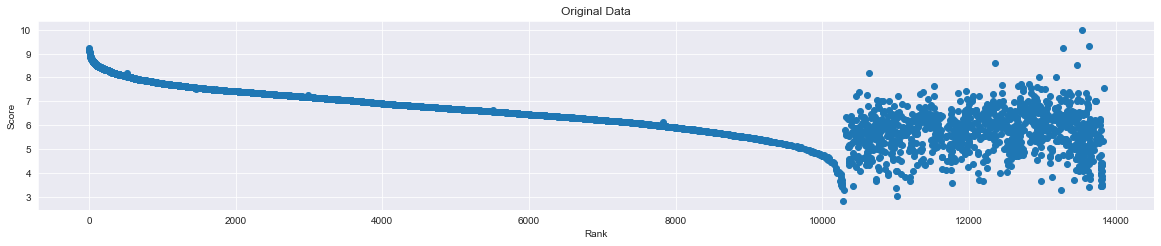

Predicted Model Linear Regression


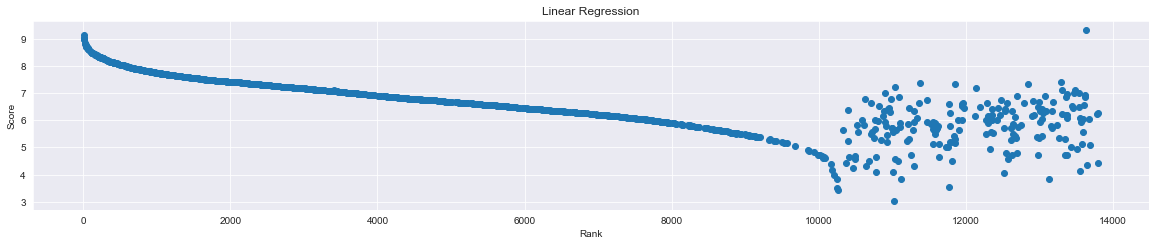

Predicted Cross Validation Model Linear Regression


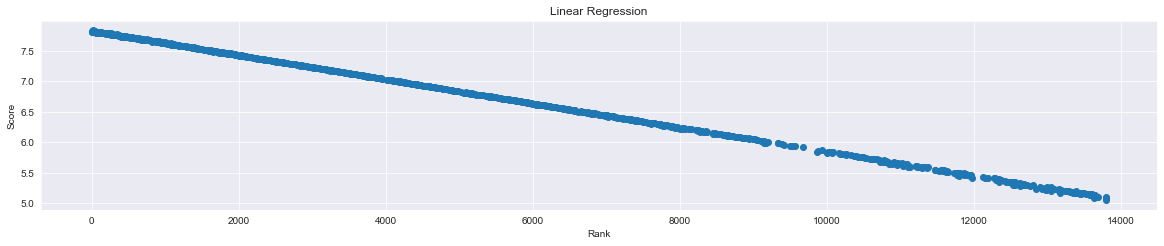

Predicted Model Ridge Regression


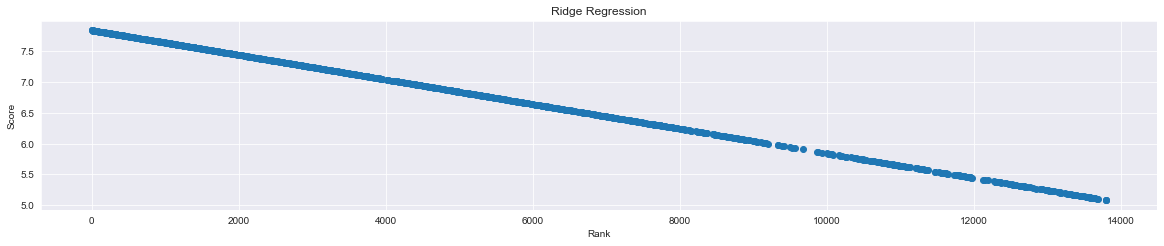

Predicted Model Lasso Regression


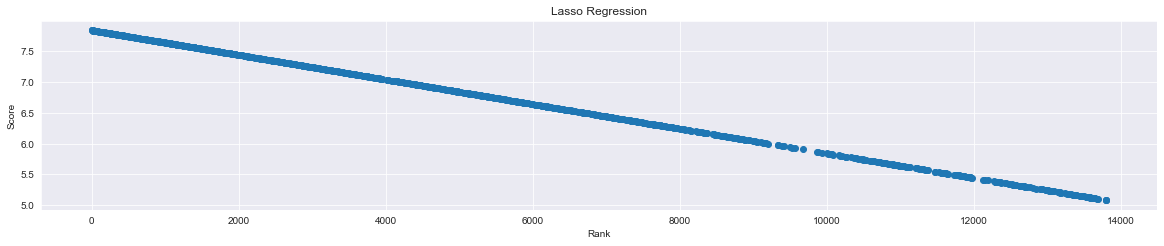

In [47]:
# ploting Linear Regression model

print('Original Data')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(413)
plt.scatter(X2,y2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Original Data')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_test)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()

# ploting Ridge Regression model

print('Predicted Cross Validation Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,cv_pred_lr2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Ridge Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_rr)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Ridge Regression')
plt.show()

# ploting Lasoo Regression model

print('Predicted Model Lasso Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_lasso01)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Lasso Regression')
plt.show()